# Pandas in a nutshell

Pandas is an essential python library, especially if you want to want to become a data scientist. 
Most of the work of adatascientist is data preparation, and that's what pandas is good at.

You can install it with

    pip install pandas
    
or with 

    conda install pandas
    
if you use Anaconda.

For the full pandas documentation see https://pandas.pydata.org/docs/. Pandas Getting Started Guide: https://pandas.pydata.org/docs/getting_started/index.html#getting-started.
For a moderatley nice **cheat sheet** on data manipulation with pandas, check out https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf.
For the basic basics of plotting with pandas, see https://www.enthought.com/wp-content/uploads/2019/09/Enthought-Pandas-Cheat-Sheet-1-Plotting-with-Series-and-DataFrames-v1.0.2.pdf.
For more complete info on plotting with pandas see https://pandas.pydata.org/docs/user_guide/visualization.html. 


## 1. Importing the library
Pandas is typically imported into the namespace pd, just as numpy is typically imported as np.

In [251]:
import numpy as np
import pandas as pd

## 2. Data Series
On Monday I told you that **pandas DataFrames** can be thought of as ExcelSheets. 
To begin with pandas, it is helpful to start with "one-column ExcelSheets" that are represented py **pandas Series**. For the full documentation of pandas Series see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html.

0               Wallcreeper
1               Lammergeier
2               Lammergeier
3               Lammergeier
4             Dupont's Lark
5     Pin-tailed Sandgrouse
6               Lammergeier
7               Wallcreeper
8            Little Bustard
9             Dupont's Lark
10              Wallcreeper
11              Wallcreeper
12             Citril Finch
13           Black Wheatear
14                Snowfinch
Name: birds, dtype: object

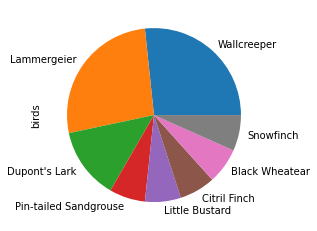

In [252]:
# Data Series of strings
observed_birds = pd.Series(["Wallcreeper",
                            "Lammergeier",
                            "Lammergeier",
                            "Lammergeier",
                            "Dupont's Lark",
                            "Pin-tailed Sandgrouse",
                            "Lammergeier",
                            "Wallcreeper",
                            "Little Bustard",
                            "Dupont's Lark",
                            "Wallcreeper",
                            "Wallcreeper",
                            "Citril Finch",
                            "Black Wheatear",
                            "Snowfinch"
                            ], 
                           dtype = str, # if you put nothing here, pandas inferres the type itself
                           name = "birds")
# and you can plot the number of appearances of each bird, e.g. in apie chart
observed_birds.value_counts().plot.pie()
observed_birds

Data Series can contain all types of data, and of course also floats. As an example, we'll draw som Gaussian random numbers and plot a histogram for them. Note that for adding a matplotlib line, we didn't even have to import matplotlib beforehand.

0       1.264966
1       2.669829
2       4.122748
3       0.602609
4       0.388666
          ...   
9995    2.905504
9996    0.499307
9997    2.410242
9998    0.747855
9999    0.309164
Length: 10000, dtype: float64

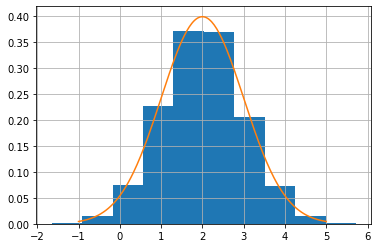

In [253]:
# you can also gererate a Data Series of floats...
sigma = 1
mu = 2
random_number = pd.Series(np.random.normal(mu, sigma, 10000)) # 10000 gaussian random numbers around 2 with sigma=1
# ... and plot the NORMALIZED histogram in one line
ax = random_number.hist(density=True)
# add the analytic formula of the gaussian 
x = np.linspace(-1, 5, 200)
ax.plot(x, np.exp(-(x-mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma))
random_number

# TAREA 1: label x and y axis, change the color of the bars and the line, give the plot a title.

In [254]:
# and back to numpy 
random_number.to_numpy()

array([1.26496631, 2.66982851, 4.1227478 , ..., 2.41024176, 0.74785484,
       0.30916376])

Not below that simple numpy operations can be directly applied on a Series. The output is a gain a pandas Series. Also noe how you can adapt the number of bins in the histogram (default =10). See more features of the pandas hist function by typing
    
    help(random_number.hist())
    
Here, we print some statistics of abs(random_number) using the pandas Series funcion **describe**

0       1.264966
1       2.669829
2       4.122748
3       0.602609
4       0.388666
          ...   
9995    2.905504
9996    0.499307
9997    2.410242
9998    0.747855
9999    0.309164
Length: 10000, dtype: float64

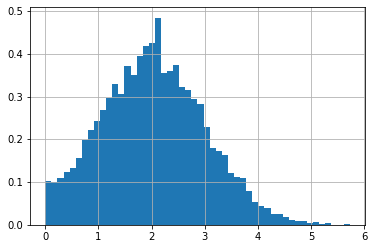

In [255]:
ax = abs(random_number).hist(bins=50, density=True)
abs(random_number).describe()
random_number

# TAREA 2: add the analytic expression of the probability density as a line. 


## 3. Pandas DataFrames
Now we really come to the Excel Sheets. Of course (!) pandas can do a LOT more than you could do with Excel, but their basic funcionalities are comparable. You find th efull documentation here: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html.

### 3.1 Generating Pandas DataFrames
.. and some manipulations.

In [256]:
# There are plenty of different ways to create a DataFrame. 

# An empty DataFrame can be created by
df = pd.DataFrame()  
df

""


In [257]:
# This empty DataFrame can be filled columnwise with lists
df["Country"]  = ["UK",     "France", "Spain"]
df["Capital"] = ["London", "Paris", "Madrid"]
df["Inhabitants Country in Mio"] = [67.22, 67.39, 47.35]
df

,Country,Capital,Inhabitants Country in Mio
0,UK,London,67.22
1,France,Paris,67.39
2,Spain,Madrid,47.35


In [258]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [259]:
df.columns

Index(['Country', 'Capital', 'Inhabitants Country in Mio'], dtype='object')

In [260]:
# You can also create a single-column DataFrame from a list
df = pd.DataFrame( ["UK", "France", "Spain"], columns = ["Country"])  
df

,Country
0,UK
1,France
2,Spain


In [261]:
# or start from a **python dictionary** with lists as values.
country_dict = { "Country" :            ["UK",     "France", "Spain"],
                 "Capital":            ["London", "Paris", "Madrid"],
                 "Inhabitants Country in Mio": [67.22, 67.39, 47.35]}
# write DataFrame to file, but without the index
pd.DataFrame(country_dict).to_csv("countries.csv", index = False)
# print inline
country_df = pd.DataFrame(country_dict) # in jupyter, we just write the name of the dataFrame into the last line to show it nicely.
# in a *.py file (in a script) 

In [262]:
# If you pass a dictionary with scalars instead of lists, you have to tell pandas how to interpret that (item())
fruit_colors = {"banana": "yellow",
                "apple" : "green",
                "orange": "orange",
                "cherry": "red",
                "berry" : "black",
                "hammer": "grey"
               }
fruit_df = pd.DataFrame(fruit_colors.items(), 
                        columns=["fruit", "color"])
fruit_df

,fruit,color
0,banana,yellow
1,apple,green
2,orange,orange
3,cherry,red
4,berry,black
5,hammer,grey


In [263]:
# you might want to have fruit as the index
fruit_df = fruit_df.set_index("fruit")
fruit_df

,color
fruit,
banana,yellow
apple,green
orange,orange
cherry,red
berry,black
hammer,grey


In [264]:
# or you might regret setting birds as the index
fruit_df.reset_index()

,fruit,color
0,banana,yellow
1,apple,green
2,orange,orange
3,cherry,red
4,berry,black
5,hammer,grey


In [265]:
# hammer is not a fruit so we just drop it
fruit_df = fruit_df.drop("hammer")
fruit_df

,color
fruit,
banana,yellow
apple,green
orange,orange
cherry,red
berry,black


In [266]:
# !!! note the difference between dropping and popping: 
# for popping you don't have to write df=df.pop() but just df.pop() to change df!!
country_df.pop("Inhabitants Country in Mio")
country_df

,Country,Capital
0,UK,London
1,France,Paris
2,Spain,Madrid


All these methods imply that the lists are all in the same order.

In [267]:
# You can also convert a Series into a DataFrame (they are not the same thing!)
birds_df = pd.DataFrame(observed_birds)
# Note that the Series name is now the column name
birds_df

,birds
0,Wallcreeper
1,Lammergeier
2,Lammergeier
3,Lammergeier
4,Dupont's Lark
5,Pin-tailed Sandgrouse
6,Lammergeier
7,Wallcreeper
8,Little Bustard
9,Dupont's Lark


In [268]:
# And finally, and quite common, you can load excel sheets, csv files ( ..json, pickle, parquet..)
# use help(pd.read_csv("countries.csv") ) to know more
country_df = pd.read_csv("countries.csv") 
# equivalent: pd.read_excel("countries.xlsx")
country_df

,Country,Capital,Inhabitants Country in Mio
0,UK,London,67.22
1,France,Paris,67.39
2,Spain,Madrid,47.35


# TAREA 3: add an other country with capital and inhabitants to the table. 


### 3.2 Operations on DataFrames

#### 3.2.1 Indexing and selecting data

In [269]:
# we start from 
country_df

,Country,Capital,Inhabitants Country in Mio
0,UK,London,67.22
1,France,Paris,67.39
2,Spain,Madrid,47.35


#### 3.2.1.1 Slicing
With Slicing, your output is a DataFrame or a Series. 

In [270]:
country_df["Capital"] # returns a Series

0    London
1     Paris
2    Madrid
Name: Capital, dtype: object

In [271]:
country_df.Capital # same thing; therefore: try to avoid using spaces in your column names

0    London
1     Paris
2    Madrid
Name: Capital, dtype: object

In [272]:
country_df.Capital = ["LON", "PAR", "MAD"] # you can replace complete columns like this
country_df

,Country,Capital,Inhabitants Country in Mio
0,UK,LON,67.22
1,France,PAR,67.39
2,Spain,MAD,47.35


In [273]:
country_df[["Country","Capital"]] # returns a DataFrame, note the flipped order of columns

,Country,Capital
0,UK,LON
1,France,PAR
2,Spain,MAD


In [274]:
country_df[country_df["Country"]=="France"] # use Boolean expressions for picking a row/ several rows

,Country,Capital,Inhabitants Country in Mio
1,France,PAR,67.39


In [275]:
country_df[country_df["Inhabitants Country in Mio"] > 50] # Another boolean expression

,Country,Capital,Inhabitants Country in Mio
0,UK,LON,67.22
1,France,PAR,67.39


In [276]:
country_df[country_df["Country"]=="Spain"].Capital

2    MAD
Name: Capital, dtype: object

#### 3.2.1.2 Indexing by label with **loc**
To change individual fields of the dataframe you need to use loc (by label) or iloc (by position).
With indexing, your output is the value of the field.

In [277]:
# df.loc[row_indexer,column_indexer]
country_df.loc[2, "Capital"]

'MAD'

# TAREA 4: Catalunya has 7.57 Mio inhabitants. Imagine that it gets independent today. Update the number of inhabitants in the row of Spain, and change the name "Spain" to "Spain (wo Catalunya)" 
Hints
1. consider using either **set_index**, or **boolean expressions** and **.index**.
2. try not to calculate 47.35-7.57 yourself.

#### 3.2.1.2 Indexing by position with **iloc**

In [278]:
country_df.iloc[1, 2]

67.39

### 3.2.2 Transposing, Sorting, and more

In [279]:
country_df.T

,0,1,2
Country,UK,France,Spain
Capital,LON,PAR,MAD
Inhabitants Country in Mio,67.22,67.39,47.35


In [280]:
country_df.T.sort_index(axis=0, ascending=True) # try also: ascending = False

,0,1,2
Capital,LON,PAR,MAD
Country,UK,France,Spain
Inhabitants Country in Mio,67.22,67.39,47.35


In [281]:
country_df.sort_values(by="Inhabitants Country in Mio")

,Country,Capital,Inhabitants Country in Mio
2,Spain,MAD,47.35
0,UK,LON,67.22
1,France,PAR,67.39


## 4. Final Remarks

1. use tab completion in pandas: start to write df.pl and fill by pressing TAB to complete, e.g. to df.plot()
2. depending on what we find in the databases that you chose, we might have to deal with Missing Data https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data
